In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data_dir = "../../../data/anechoic/nothing-rbw"
rbws = [10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800]

In [4]:
cfg = np.load(os.path.join(data_dir, 'config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']

Text(0.5, 1.0, 'RBW = 10kHz, Tx = 0, Rx = 0')

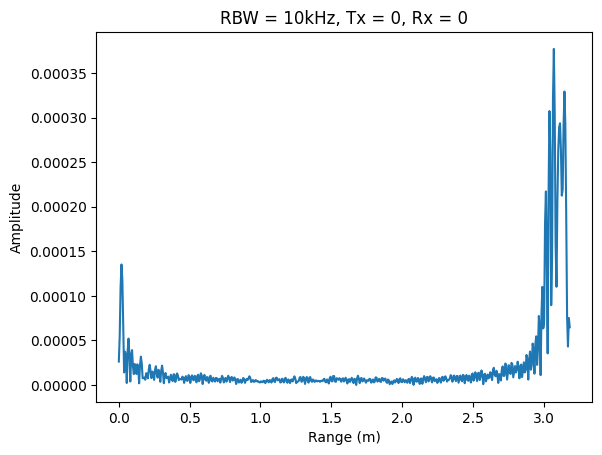

In [5]:
recData = np.load(os.path.join(data_dir, 'recording_10kHz.npy'))
meanData = np.mean(recData, axis=0)
rp = np.fft.ifft(meanData, axis=1, n=nfft)
plt.plot(dist_vec, np.abs(rp[0, :]))
plt.xlabel('Range (m)')
plt.ylabel('Amplitude')
plt.title('RBW = 10kHz, Tx = 0, Rx = 0')

Text(0.5, 1.0, 'Range Profile across RBW, Tx = 0, Rx = 0')

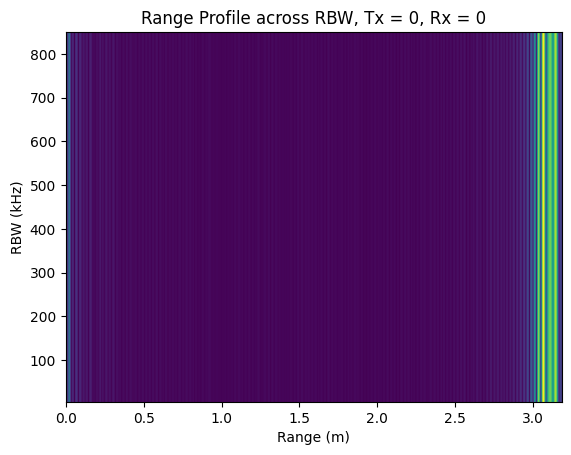

In [6]:
rbw_rp = np.zeros((len(rbws), nfft), dtype=np.complex64)
for i in range(len(rbws)):
    recData = np.load(os.path.join(data_dir, 'recording_10kHz.npy'))
    meanData = np.mean(recData, axis=0)
    rp = np.fft.ifft(meanData, axis=1, n=nfft)
    rbw_rp[i, :] = np.abs(rp[0, :])

plt.pcolormesh(dist_vec, rbws, np.abs(rbw_rp))
plt.xlabel('Range (m)')
plt.ylabel('RBW (kHz)')
plt.title('Range Profile across RBW, Tx = 0, Rx = 0')

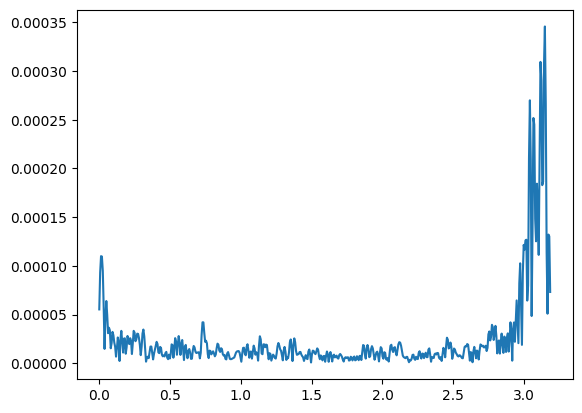

In [18]:
cr_data = np.load('../../../data/motionstage/1mm-away-rbw-800/recording.npy')
cal_data = np.load(os.path.join(data_dir, 'recording_800kHz.npy'))
plt.plot(dist_vec, np.abs(np.fft.ifft(np.mean(cr_data, axis=0)[0, :], n=nfft)))

Text(0.5, 1.0, 'Corner Reflector at 0.4m, before calibration')

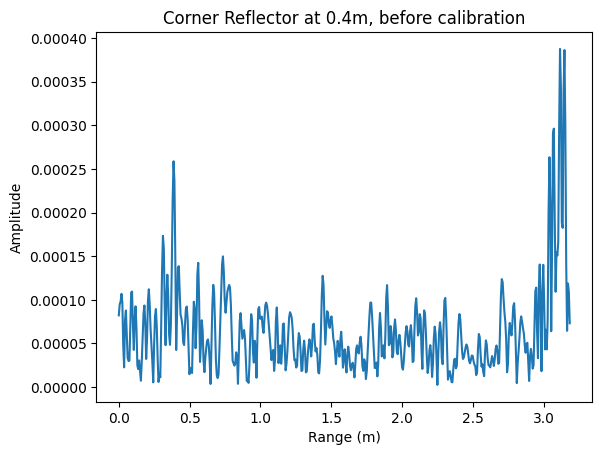

In [19]:
rp_cr = np.fft.ifft(cr_data[0, 0, :], n=nfft)
plt.plot(dist_vec, np.abs(rp_cr))
plt.xlabel('Range (m)')
plt.ylabel('Amplitude')
plt.title('Corner Reflector at 0.4m, before calibration')

Text(0.5, 1.0, 'Corner Reflector at 0.4m, after calibration')

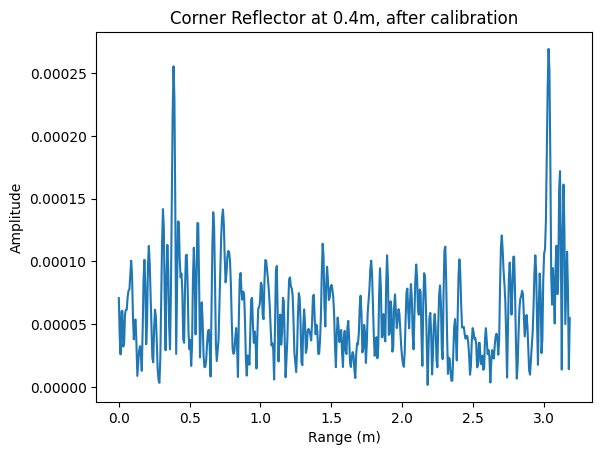

In [20]:
cr_data_cal = cr_data - np.mean(cal_data, axis=0)
rp_cr_cal = np.fft.ifft(cr_data_cal[0, 0, :], n=nfft)
plt.plot(dist_vec, np.abs(rp_cr_cal))
plt.xlabel('Range (m)')
plt.ylabel('Amplitude')
plt.title('Corner Reflector at 0.4m, after calibration')